# Late blight prediction for the Columbia Basin of Washington

# Date: 3/25/2020

# Authors:
- Original models were developed by Dennis Johnson and colleagues:
    - Johnson DA, Alldredge JR, and Vakoch DL. 1996. Potato late blight forecasting models for the semiarid environment of south-central Washington. Phytopathology 86:480-484. https://www.apsnet.org/publications/phytopathology/backissues/Documents/1996Articles/Phyto86n05_480.PDF
    - Johnson DA, Alldredge JR, and Hamm PB. 1998. Expansion of potato late blight forecasting models for the Columbia Basin of Washington and Oregon. Plant Dis. 82:642-645. https://apsjournals.apsnet.org/doi/pdfplus/10.1094/PDIS.1998.82.6.642
    - Johnson DA, Cummings TF, Abi Ghanem R, and Alldredge JR. 2009. Association of solar irradiance and days of precipitation with incidence of potato late blight in the semiarid environment of the Columbia Basin. Plant Dis. 93:272-280. https://apsjournals.apsnet.org/doi/pdfplus/10.1094/PDIS-93-3-0272
    - Johnson DA, and Cummings TF. 2016. In-canopy environment of sprinkler irrigated potato fields as a factor for late blight management in the semiarid environment of the Columbia Basin. Am J. Potato Res: 93:239-252 https://link.springer.com/article/10.1007/s12230-016-9500-1


- This script was written by David Linnard Wheeler
       

## Growers with whom to collaborate:

### East side of Cascades:
- **South Basin** – Mike Madsen from AgriNW (mmadsen@agrinw.com) 
- **Tri-Cities/Grandview Farms, Pasco** - Jack Jensen (Jack.B.Jensen@simplot.com)
- **Central Basin** – Grant Morris from Schneider farms (grantmorris@live.com)
- **North Basin** – Marvin Wollman from Warden Hutterian Brethren (potatoemaker@gmail.com)
- **Moses lake** - Brett Reynolds (bwreynolds@me.com) - not confirmed
- **Moses lake** - Heath Gimmestad (heath@friehefarms.com) - not confirmed


### West side of Cascades:
 - **Burlington** - Kraig Knutzen: 360-661-2122 | kraig@knutzenfarms.com

# Objectives

**Predict late blight epidemics in the Columbia Basin of Washington State**

# Procedures

## Risk

**Risk is the product of 5 factors**

**Risk** = **A** (phenology) $\cdot$ **B** (occurrence of late blight in field or adjacent fields) $\cdot$ **C** (probability of late blight occurrence in the Columbia Basin (PROB)) $\cdot$ **D** (date) $\cdot$ **E** (number of rainy days expected in the next 7 days)

### A (phenology)

**Source of information: growers**

| Factor level | Factor value |
| --- | --- |
| Pre-emergence | 0 |
| Emergence to before plant closure between rows | 0 |
| Plant closure between rows (foliage touching between adjacent rows) | 1 |
|Post row closure to harvest | 1 |

**Notes from Dennis Johnson**:
- "Late blight has never been reported in the Columbia Basin (CB) before plant closure between rows. The canopy environment becomes favorable of late blight after closure between adjacent rows. 
- Reference: Johnson, D. A. and T.F. Cummings. 2016. In-canopy environment of sprinkler irrigated potato fields as a factor for late blight management in the semiarid environment of the Columbia Basin. Am J. Potato Res: 93:239-252."


In [15]:
while True:
    # Request user input
    A = input("What is the phenology of the potato field?\n \
                 A) Pre-emergence\n \
                 B) Emergence to before plant closure between rows\n \
                 C) Plant closure between rows (foliage touching between adjacent rows)\n \
                 D) Post row closure to harvest\n")
    # If Risk Factor (RF) A is option "A" or option "B"
    if (A == "A") or (A == "B"):
        # Set RF to 0
        A = 0
    # Else, RF is "C" or "D" and
    elif (A == "C") or (A == "D"):
        # Set it to 1
        A = 1
    # Break
    break

What is the phenology of the potato field?
                  A) Pre-emergence
                  B) Emergence to before plant closure between rows
                  C) Plant closure between rows (foliage touching between adjacent rows)
                  D) Post row closure to harvest
 A


### B (occurrence of late blight in field or adjacent fields within 5 mile radius)

**source of information: growers**

| Factor level | Factor value |
| --- | --- |
| No | 0 |
| Yes | 30 |

**Notes from Dennis Johnson**: 
- A high risk value is given if late blight is known to be present. If late blight is present, go directly to recommendations and begin fungicide applications until harvest.

In [17]:
while True:
    # Request user input
    B = input("Is late blight present within a 5 mile radius?\n \
                 A) No\n \
                 B) Yes\n")
    # If Risk Factor (RF) B is option "A"
    if (B == "A") :
        # Set RF to 0
        B = 0
    # Else, RF is "B" and
    elif (B == "B"):
        # Set it to 30
        B = 30
    # Break
    break

Is late blight present within a 5 mile radius?
                  A) No
                  B) Yes
 A


### C (probability of late blight occurrence in the Columbia Basin (PROB))

**Source of information: models**

| Factor level | Factor value |
| --- | --- |
| < 50% | 0 |
| $\geq$ 50% | 4 |

- Forecasts generated during the early season (May-July) use models 1
- Forecasts generated during the late season (August-September) use models 2

#### Models from:
- Johnson DA, Alldredge JR, and Hamm PB. 1998. Expansion of potato late blight forecasting models for the Columbia Basin of Washington and Oregon. Plant Dis. 82:642-645. https://apsjournals.apsnet.org/doi/pdfplus/10.1094/PDIS.1998.82.6.642

#### Model 1: logistic regression

- **Prosser**

> $lf = 9.252 - 4.004(Y_p) - 0.660(R_{am})$

> where:

> $Y_p$: late blight outbreak during the preceding year:
$$  
Y_p
\begin{cases}
  \text{late blight absent in previous year/ no} = 0 \\    
  \text{late blight present in previous year/ yes} = 1 
\end{cases}
$$
> $R_{am}$: number of days with rain >= 0.25 mm during April and May

- **Hermiston**

> $lf = 3.744 - 2.856(Y_p) - 0.188(R_{am})$

- **Hanford**

> $lf = 2.987 - 3.062(Y_p) - 0.163(R_{am})$

- **Othello**

> $lf = 4.723 - 3.561(Y_p) - 0.293(R_{am})$

#### Model 2: logistic regression

- **Hermiston**

> $lf = 0.730 - 3.195(Y_p) - 0.103(R_{ja})$

> where:

> $R_{ja}$: number of days with rain > = 0.25 during July and August

- **Hanford**

> $lf = 1.716 - 2.844(Y_p) - 0.094(R_{ja})$

#### Model 3: logistic regression

- **Prosser**

> $lf = 11.513 - 3.894(Y_p) - 0.719(R_{am}) - 0.259(R_{ja})$

- **Othello**

> $lf = 4.960 - 3.084(Y_p) - 0.273(R_{am}) - 0.129(R_{ja})$

#### For the logistic regression models, the probability, $P$, of an outbreak is estimated:
$$
P = \frac{1}{1 + exp^{lf}}
$$

> where $lf$ is computed from equations 3 or 4.

> - if 
$$  
P
\begin{cases}
  \geq 0.5 \rightarrow \text{ outbreak year} \\    
  < 0.5 \rightarrow \text{ non-outbreak year}
\end{cases}
$$

**Notes from Dennis Johnson**: 
- Provide **first forecast** in early May with rainy day data from April and a 30-day forecast for May.
- If criteria for the occurrence of a late blight outbreak according to the first discriminant function or the first logistic regression model are met before June 1, a forecast for the potential occurrence of an outbreak could be made earlier. 
- The second discriminant function or the second logistic regression model could be used through July and August 31 by solving for the value Rja needed for an outbreak to occur and comparing it to the normal and expected occurrences of rainy days during July and August based on weather forecasts.
- To estimate the risk of late blight outbreak during a given year, values of each variable are multiplied by their coefficients and added to the constant. 
    - If the equation for outbreak gives a higher score than the equation for nonoutbreak, then that year is considered a late blight year (outbreak), otherwise no disease is expected (nonoutbreak).
- The logistic regression models use the same variables as each of the discriminant functions. They were calculated as an alternative to the discriminant functions to overcome the assumption that the variables have a multivariate normal distribution.
- The first discriminant function provided a lower percentage of correct classifications (88%) of outbreak and nonoutbreak years than the second discriminant function (92%), but the second function cannot be used until the end of August. 
    - The first function can be used starting the first of June. If no late blight has been observed by August 31, then the second function is used. According to 25 years of disease records, late blight outbreaks in the south-central area of Washington occur after June 14.
- Use factor 3 if any of the four locations is > 50% PROB. This gives the highest accuracy for prediction (Plant Dis. 82:642-645).
- Determine probability of late blight occurrence in the Columbia Basin using logistic regression equations with weather data form four locations. 
    - Locations are WSU Prosser-Headquarters, WSU Othello, Hanford (use WSU Tri-Cities if Hanford data are not available), Hermiston, OR from the OSE Experiment station.


In [34]:
while True:
    # Request user input
    C = input("What is the probability of late blight occurrence in the Columbia Basin of Washington?\n \
                 A) <50% \n \
                 B) >50% \n")
    # If Risk Factor (RF) C is option "A"
    if (C == "A") :
        # Set RF to 0
        C = 0
    # Else, RF is "B" and
    elif (C == "B"):
        # Set it to 30
        C = 4
    # Break
    break

What is the probability of late blight occurrence in the Columbia Basin of Washington?
                  A) <50% 
                  B) >50% 
 B


### D (date)

**Source of information: internet**

| Factor level | Factor value |
| --- | --- |
| December - April | 0 |
| May, July - November | 1 |
| June | 3J |

**Notes from Dennis Johnson**:
- The canopy environment is more conducive for late blight in June than May, July and August. Thus the reason for a higher risk factor in June than the other months. 
- Reference: Johnson, D. A. and T.F. Cummings. 2016.
- In-canopy environment of sprinkler irrigated potato fields as a factor for late blight management in the semiarid environment of the Columbia Basin. Am J. Potato Res: 93:239-252.

In [46]:
while True:
    # Request user input
    D = input("What is the date?\n \
                 A) December through April \n \
                 B) May, July - November \n \
                 C) June \n")
    # If Risk Factor (RF) D is option "A"
    if (D == "A") :
        # Set RF to 0
        D = 0
    # Else, if RF is "B" and
    elif (D == "B"):
        # Set it to 1
        D = 1
    # Else, RF is "C" and
    elif (D == "C"):
        # Set it to 3J
        D = 3J
    # Break
    break

What is the date?
                  A) December through April 
                  B) May, July - November 
                  C) June 
 d


### E (number of rainy days expected in the next 7 days) (> 30% probability)

**Source of information: Obtain rain forecasts from Fox Weather or WSU AgWeatherNet. Rain forecast of 7 days and longer can be very useful in scheduling fungicide applications for late blight (Plant Dis. 99:683-690). A rain probability of 30% has arbitrarily been used to indicate rain**

| Factor level | Factor value |
| --- | --- |
| 0 rainy days expected | 1 |
| 1 rainy days expected | 2 |
| 2 rainy days expected| 4 |
| 3 or more rainy days expected| 5 |

**Notes from Dennis Johnson:** 
- Reference: Johnson, D.A., Cummings, T.F., and Fox, A.D. 2015. 
- Accuracy of rain forecasts for use in scheduling late blight management tactics in the Columbia Basin of Washington and Oregon. Plant Dis. 99:683-690.
- Rainy period is characterized  with rainy, misty and cloudy conditions that has any of the following results: endures for > 1 hours, accumulates > 1 mm ( 0.04 inch), or canopy RH is > 90% for > 10 hrs.

In [48]:
while True:
    # Request user input
    E = input("How many rainy days are expected to occur within the next 7 days?\n \
                 A) 0 rainy days expected \n \
                 B) 1 rainy days expected \n \
                 C) 2 rainy days expected \n \
                 D) 3 or more rainy days expected\n")
    # If Risk Factor (RF) E is option "A"
    if (E == "A") :
        # Set RF to 1
        E = 1
    # Else, if RF is "B" and
    elif (E == "B"):
        # Set it to 2
        E = 2
    # Else, if RF is "C" and
    elif (E == "C"):
        # Set it to 4
        E = 4
    # Else, if RF is "C" and
    elif (E == "D"):
        # Set it to 5
        E = 5
    # Break
    break

How many rainy days are expected to occur within the next 7 days?
                  A) 0 rainy days expected 
                  B) 1 rainy days expected 
                  C) 2 rainy days expected 
                  D) 3 or more rainy days expected
 D


### Risk Factor Calculation:

**Risk** = **A** (phenology) $\cdot$ **B** (occurrence of late blight in field or adjacent fields) $\cdot$ **C** (probability of late blight occurrence in the Columbia Basin (PROB)) $\cdot$ **D** (date) $\cdot$ **E** (number of rainy days expected in the next 7 days)

In [50]:
A*B*C*D*C

''

# Recommendations

**Risk factor 0:**
- Late blight is not likely, fungicide application is not recommended. Dispose of all cull or refuse tubers and manage volunteer potato plants, especially in fields were late blight occurred the last two years. Monitor fields for late blight on regular bases.


**Risk factor 1-2:**
- Late blight is not likely, fungicide application is not recommended. Dispose of all cull or refuse tubers and manage volunteer potato plants, especially in fields were late blight occurred the last two years. Monitor fields for late blight. Monitor fields for late blight on regular bases.

**Risk factor 4-5:**
- Apply late blight fungicide before any rainy period. Dispose of all cull or refuse tubers and manage volunteer potato plants, especially in fields were late blight occurred the last two years. Monitor fields for late blight. Monitor fields for late blight on regular bases.

**Risk factor 8 – 10:**
- Apply late blight fungicide before any rainy periods and continue for 3 wks. Dispose of all cull or refuse tubers and manage volunteer potato plants, especially in fields were late blight occurred the last two years. Monitor fields for late blight. Monitor fields for late blight on regular bases.

**Risk factor 3J:**
- Apply fungicides on a 10-14 day schedule through July 4. Dispose of all cull or refuse tubers and manage volunteer potato plants, especially in fields were late blight occurred the last two years. Monitor fields for late blight. Monitor fields for late blight on regular bases.

**Risk factor 6J:**
- Apply fungicides on a 10 day schedule through July 4. Dispose of all cull or refuse tubers and manage volunteer potato plants, especially in fields were late blight occurred the last two years. Monitor fields for late blight. Monitor fields for late blight on regular bases.

**Risk factor 12J:**
- Apply fungicides on a 7-10 day schedule and before any rainy periods through July 4. Dispose of all cull or refuse tubers and manage volunteer potato plants, especially in fields were late blight occurred the last two years. Monitor fields for late blight. Monitor fields for late blight on regular bases.

**Risk factor 15J – 30J:**
- Apply fungicides on a 7 day schedule and before any rainy periods through July 4. Dispose of all cull or refuse tubers and manage volunteer potato plants, especially in fields were late blight occurred the last two years. Monitor fields for late blight. Monitor fields for late blight on regular bases.

**Risk factor 30:**
- Confirm occurrence of late blight. If present, apply late blight fungicides on a 5 to 7 day schedule and continue until harvest. Avoid over watering and irrigation during and just after rainy, cool and cloudy weather. Harvest during dry weather. Sort out rotten tubers going into storage. Consult literature on recommendations for management of late blight in the field during late season in infected tubers in storage. 

# Import data from 1970-2001

Import packages & modules

In [12]:
pip install openpyxl

     |████████████████████████████████| 242 kB 2.3 MB/s eta 0:00:01
  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8915 sha256=c0251d6a801454039ead8d6322142cbe9571498d2ab8c4d76c917194ed1da971
  Stored in directory: /Users/davidlinnardwheeler/Library/Caches/pip/wheels/e2/bd/55/048b4fd505716c4c298f42ee02dffd9496bb6d212b266c7f31
Successfully built et-xmlfile
Note: you may need to restart the kernel to use updated packages.


In [2]:
from pandas import DataFrame, read_csv
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

Import data

In [3]:
#file = r'/Users/davidwheeler/Desktop/RESEARCH/Data/LateBightForecast/Data/LateBlightData1970-2001.xlsx'
file = r'/Users/davidlinnardwheeler/Desktop/Desktop - David’s MacBook Pro/Research/LateBlight/Data/LateBlightData1970-2001.xlsx'
df = pd.read_excel(file)

# Data wrangling

**Data dimensions**

In [4]:
df.shape

(128, 32)

**Identify missing values**

In [5]:
df['Ram'].value_counts(sort=True)

8     15
12    14
9     11
13    11
16     9
6      8
10     8
11     8
15     7
17     6
5      5
7      5
14     5
.      4
3      3
4      2
18     2
19     2
20     1
22     1
26     1
Name: Ram, dtype: int64

* **Replace "." with NaN**

In [6]:
df = df.replace('.',np.NaN)

* **Number of NANs**

In [7]:
df.isnull().sum()

Year               0
Location           0
Area_affected     16
Ram                4
Rja                4
Pm                98
Unnamed: 6       128
Unnamed: 7       128
Unnamed: 8       128
Unnamed: 9       128
Unnamed: 10      128
Unnamed: 11      128
Unnamed: 12      128
Unnamed: 13      128
Unnamed: 14      128
Unnamed: 15      128
Unnamed: 16      128
Unnamed: 17      128
Unnamed: 18      128
Unnamed: 19      128
Unnamed: 20      128
Unnamed: 21      128
Unnamed: 22      128
Unnamed: 23      128
Unnamed: 24      128
Unnamed: 25      128
Unnamed: 26      128
Unnamed: 27      128
Unnamed: 28      128
Unnamed: 29      128
Unnamed: 30      128
Unnamed: 31      128
dtype: int64

**Data types**

In [8]:
df.dtypes

Year               int64
Location          object
Area_affected    float64
Ram              float64
Rja              float64
Pm               float64
Unnamed: 6       float64
Unnamed: 7       float64
Unnamed: 8       float64
Unnamed: 9       float64
Unnamed: 10      float64
Unnamed: 11      float64
Unnamed: 12      float64
Unnamed: 13      float64
Unnamed: 14      float64
Unnamed: 15      float64
Unnamed: 16      float64
Unnamed: 17      float64
Unnamed: 18      float64
Unnamed: 19      float64
Unnamed: 20      float64
Unnamed: 21      float64
Unnamed: 22      float64
Unnamed: 23      float64
Unnamed: 24      float64
Unnamed: 25      float64
Unnamed: 26      float64
Unnamed: 27      float64
Unnamed: 28      float64
Unnamed: 29      float64
Unnamed: 30      float64
Unnamed: 31      float64
dtype: object

- numerical

In [9]:
[f for f in df.columns if df.dtypes[f] != 'object']

['Year',
 'Area_affected',
 'Ram',
 'Rja',
 'Pm',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Unnamed: 29',
 'Unnamed: 30',
 'Unnamed: 31']

> convert year to object

In [10]:
df.Year = df.Year.astype(object)

- categorical

In [11]:
[f for f in df.columns if df.dtypes[f] == 'object']

['Year', 'Location']

**Summary statistics**

- numerical

In [13]:
df[[ 'Area_affected',
 'Ram',
 'Rja',
 'Pm']].describe()

,Area_affected,Ram,Rja,Pm
count,112.000000,124.000000,124.000000,30.000000
mean,8468.928571,11.177419,5.564516,13.284333
std,16350.904284,4.269476,3.492715,10.542742
min,0.000000,3.000000,0.000000,0.510000
25%,0.000000,8.000000,3.000000,6.657500
50%,45.000000,11.000000,5.000000,11.435000
75%,11112.500000,14.000000,7.000000,14.997500
max,65000.000000,26.000000,19.000000,47.290000


- categorical

In [14]:
[df[f].unique() for f in df.columns if df.dtypes[f] == 'object']

[array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
        1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
        1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001],
       dtype=object),
 array(['Prosser', 'Hermiston', 'Hanford', 'Othello'], dtype=object)]

# Exploratory data analysis

Boxplots

- First define categorical data

In [15]:
cat_df = [f for f in df.columns if df.dtypes[f] == 'object']
df[cat_df]

,Year,Location
0,1970,Prosser
1,1971,Prosser
2,1972,Prosser
3,1973,Prosser
4,1974,Prosser
...,...,...
123,1997,Othello
124,1998,Othello
125,1999,Othello
126,2000,Othello


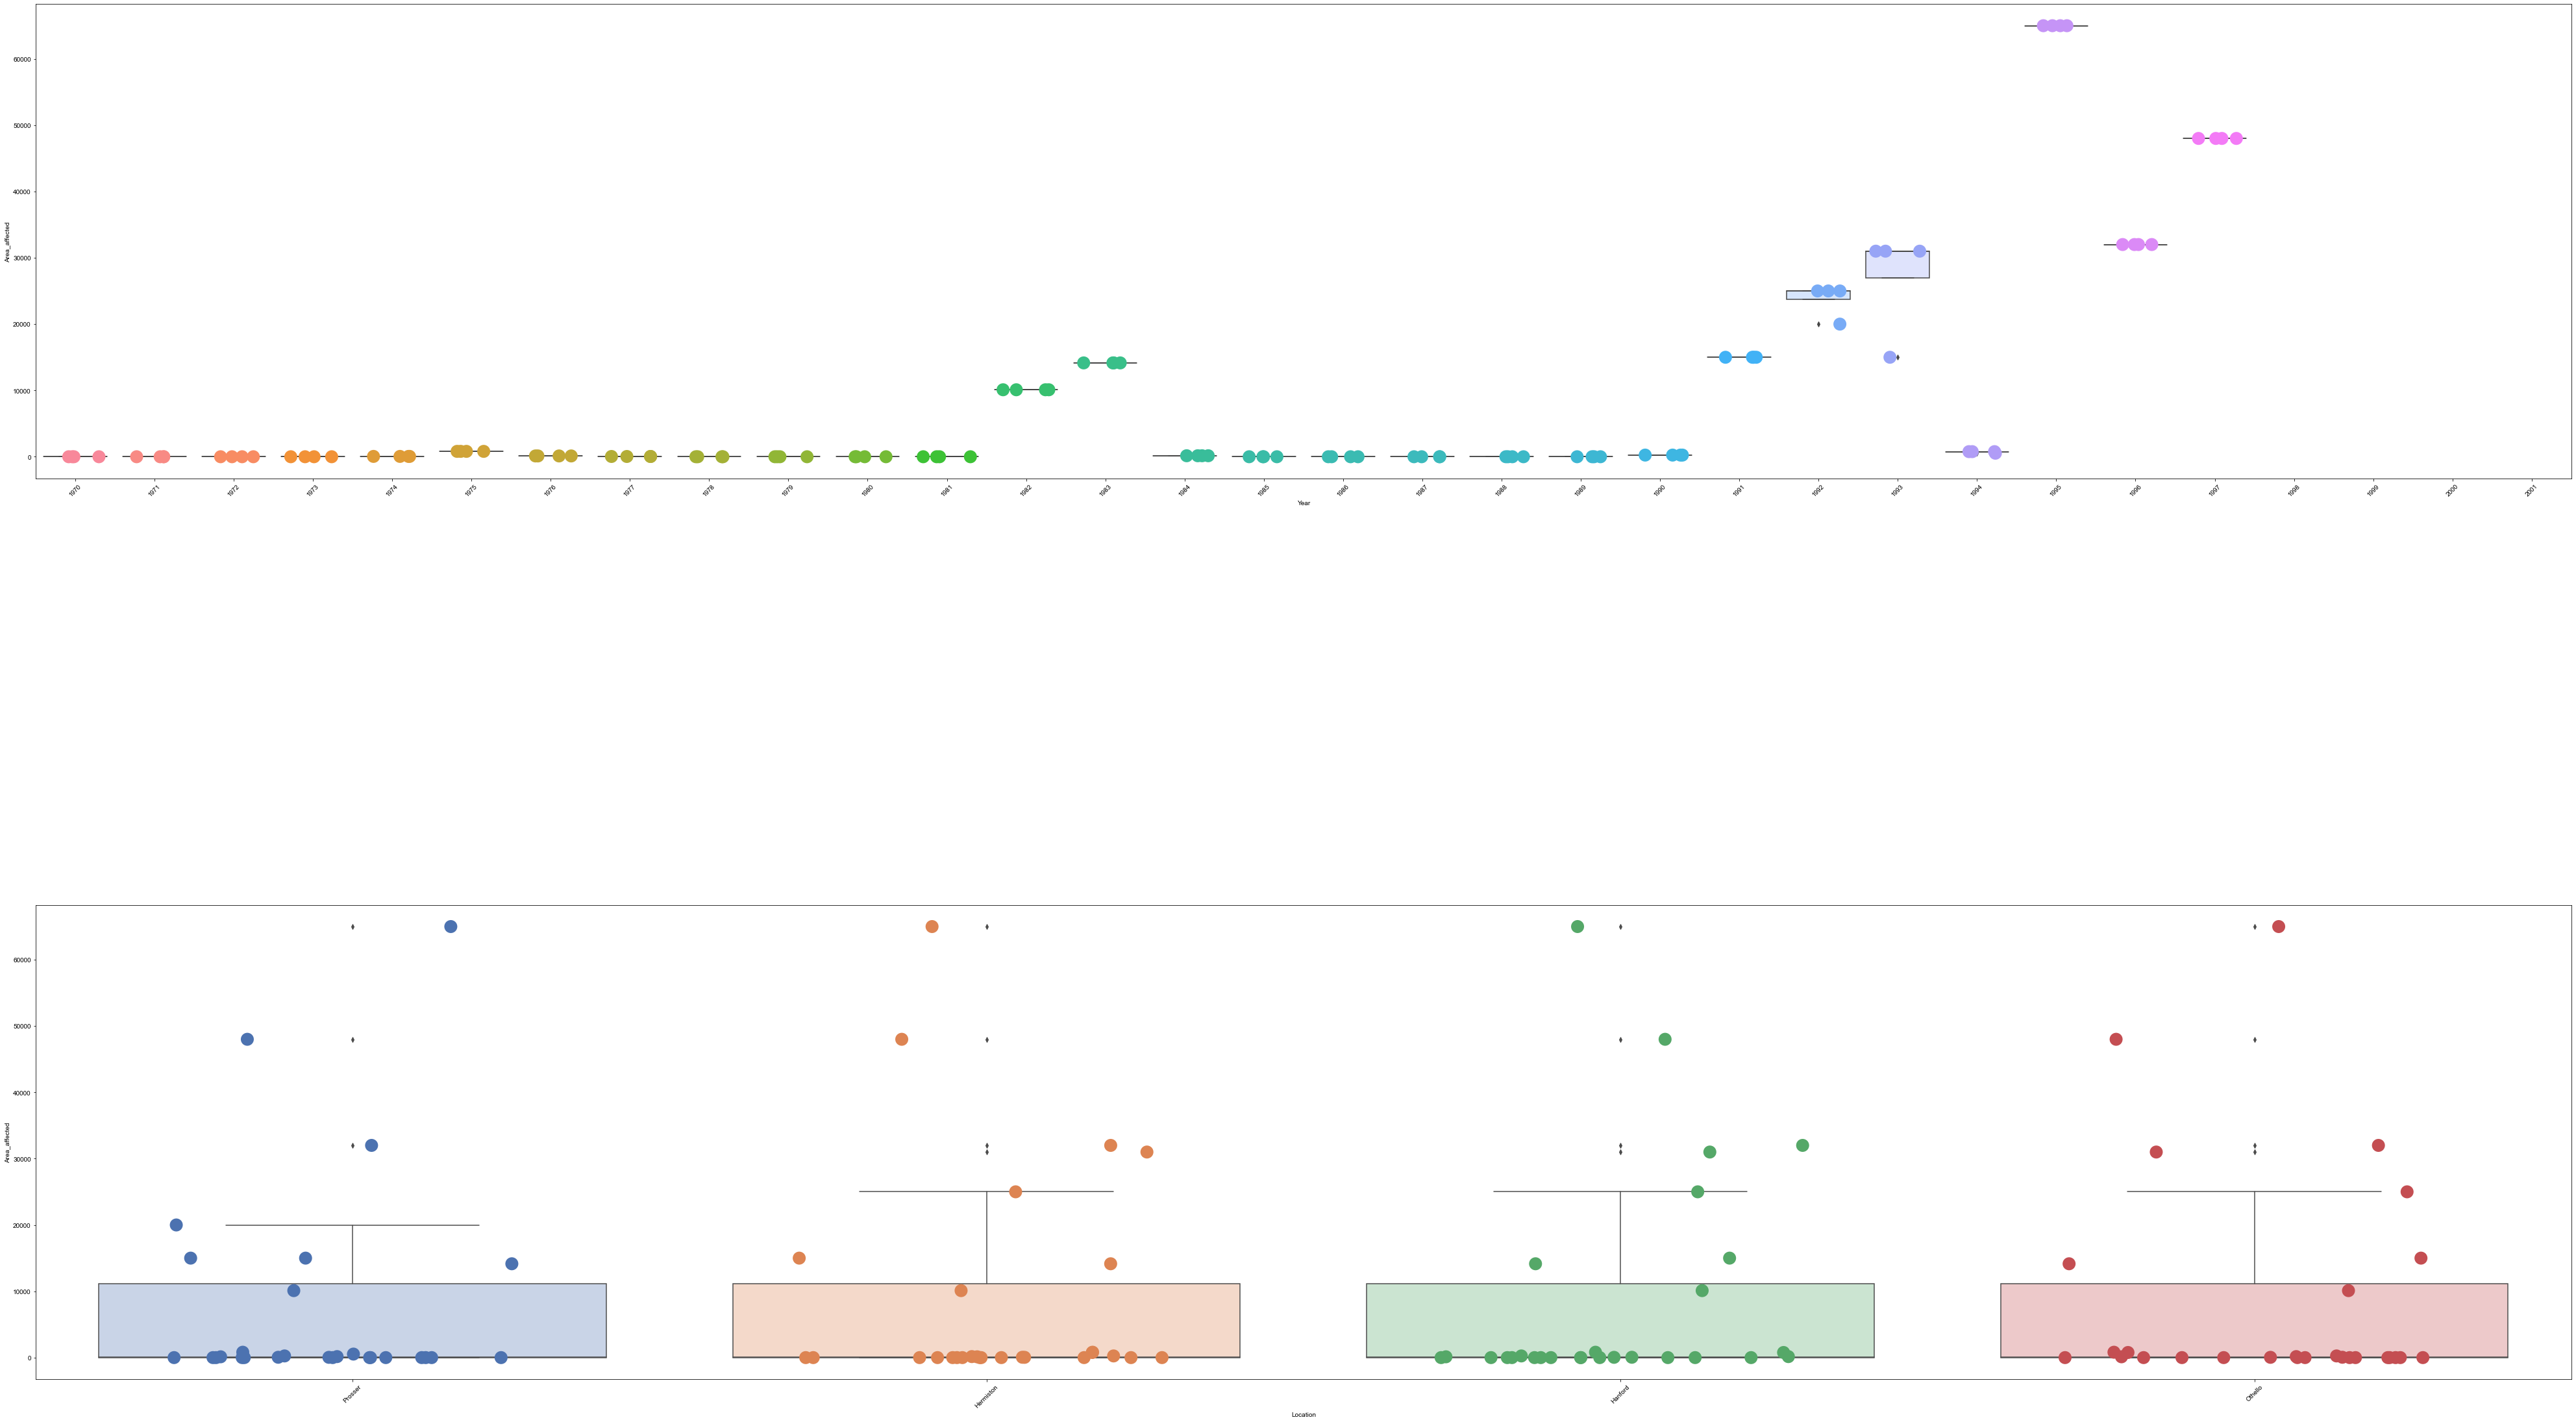

In [16]:
# plot dimensions
fig, ax = plt.subplots(4, 1, figsize=(70,90))
# Flatten
ax = ax.flatten()
# Unravel
ax = np.ravel(ax)
# Spaces between
fig.subplots_adjust(wspace=0.2, 
                    hspace=0.9)
# Unravel
for feature, subplot in zip(df[cat_df], ax.flatten()):
    # Format
    sns.set(style="whitegrid",
            color_codes=True,
            font_scale = 2)
# #     # Figure size
#      plt.figure(figsize=(16, 6))
# #     # Title
#      plt.title("Sale price of homes vs neighborhood", fontsize=20) # the "+ feature" syntax generated an error
# #     # Boxplot
    p = sns.boxplot(x = feature,
                y = 'Area_affected', saturation=1,
                data=df, ax=subplot)

    # Reduce opacity
    for patch in p.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .3))

    # Add jittered observations
    p = sns.stripplot(x = feature,
                  y = 'Area_affected',
                  data=df,
                  jitter=0.3, size=20, ax=subplot)

    # Rotate x-axis labels
    p.set_xticklabels(p.get_xticklabels(),
                  rotation=45);
    
# Remove extra plots
for i in range(len(df[cat_df].columns), 4*1):
    fig.delaxes(ax[i])

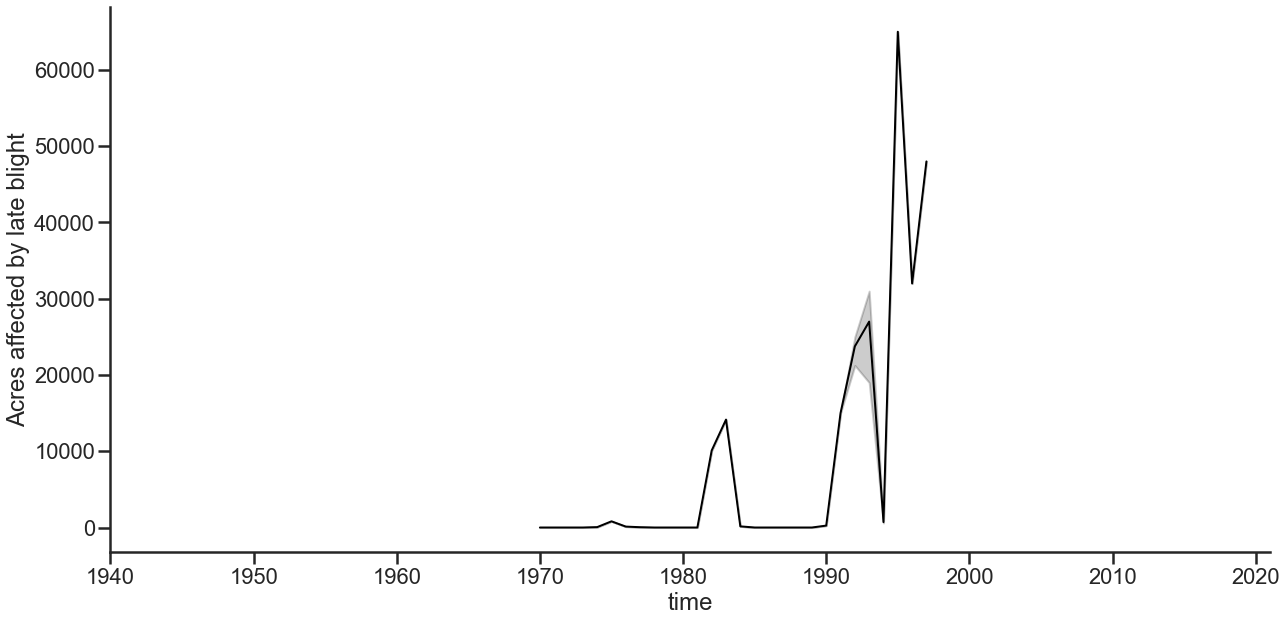

In [20]:

# White background
sns.set_style("ticks")
sns.set_context("poster")
# plot dimensions
# sns.lineplot(data=df, x="Year", y="Area_affected",
#             #hue="Location",
#              err_style="bars", ci=95);

p=sns.relplot(data=df, x="Year", y="Area_affected", kind="line", color='black', linewidth=2);
p.fig.set_size_inches(25, 10)
p.set(xlabel='time', ylabel='Acres affected by late blight',
      xlim=(1940,2021));

In [25]:
df[['Year', 'Location', 'Area_affected', 'Ram', 'Rja', 'Pm']].corr()

,Area_affected,Ram,Rja,Pm
Area_affected,1.000000,0.232791,0.268042,-0.126934
Ram,0.232791,1.000000,0.097362,0.187288
Rja,0.268042,0.097362,1.000000,-0.176323
Pm,-0.126934,0.187288,-0.176323,1.000000


Scatterplot matrix

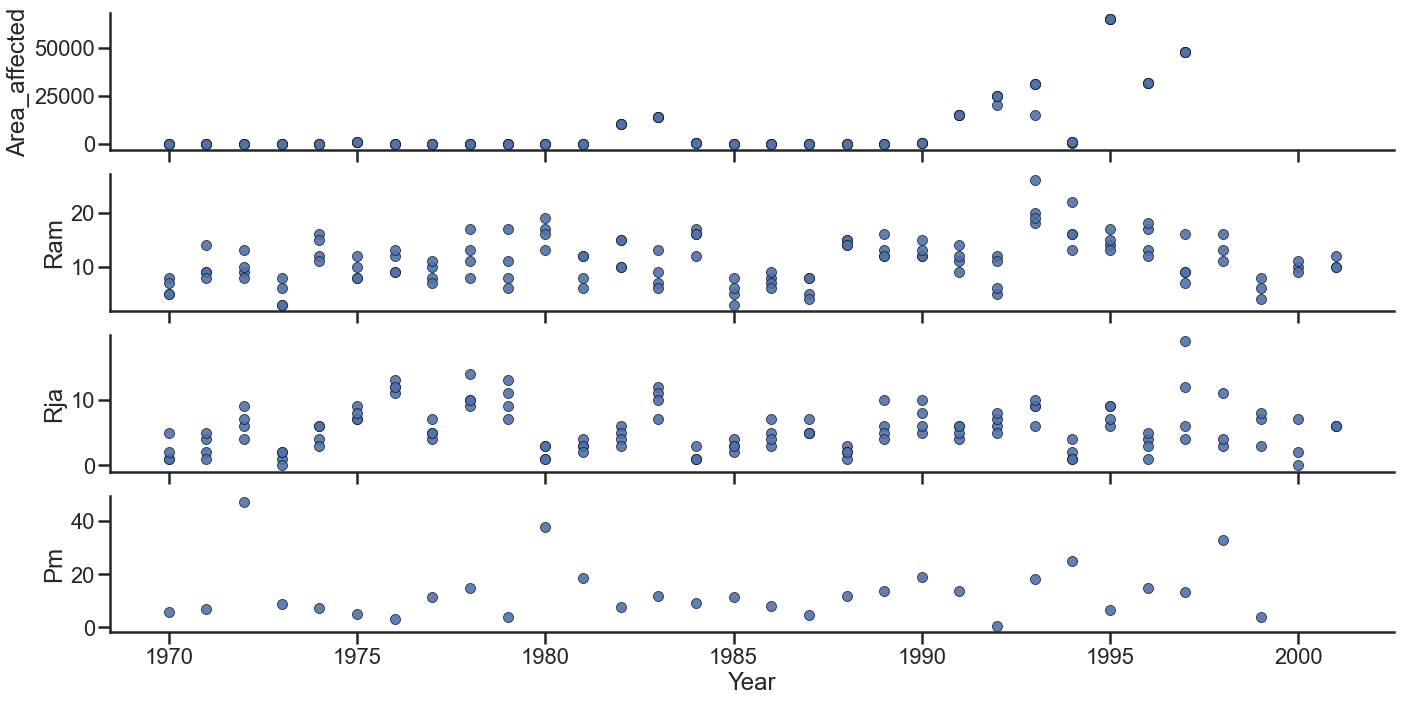

In [47]:
# sns.pairplot(df[['Area_affected', 'Ram', 'Rja', 'Pm']],
#              hue="Location")
sns.pairplot(
    df,
    x_vars=["Year"],
    y_vars=['Area_affected', 'Ram', 'Rja', 'Pm'],
    #hue="Location",
    plot_kws = {'alpha': 0.9, 's': 100, 'edgecolor': 'k'},
    height=2.5, aspect=8);

# Graveyard

#### Models from:
 - Johnson DA, Alldredge JR, and Vakoch DL. 1996. Potato late blight forecasting models for the semiarid environment of south-central Washington. Phytopathology. 86:480-484. https://www.apsnet.org/publications/phytopathology/backissues/Documents/1996Articles/Phyto86n05_480.PDF

- **Two discriminant functions** and **two logistic regression models** were developed to forecast outbreaks of late blight (*Phytophthora infestans*) on potato (mainly Russet Burbank) in the south-central area of Washington State, a semiarid environment where late blight occurs sporadically.

- 1). The **first discriminant function**:
$$
\textbf{Non-outbreak} = -4.426 + 2.052(Y_p) + 0.863(R_{am}) + 0.052(P_{m})
$$

$$
\textbf{Outbreak} = -11.886 + 6.191(Y_p) + 1.462(R_{am}) - 0.033(P_m)
$$

> where:

> - $Y_p$: late blight outbreak during the preceding year:
$$  
Y_p
\begin{cases}
  \text{late blight absent in previous year/ no} = 0 \\    
  \text{late blight present in previous year/ yes} = 1 
\end{cases}
$$
> - $R_{am}$: number of days with rain >= 0.25 mm during April and May
> - $P_m$: total precipitation during May when daily minimum temperature was greater or equal to 5 $^{\circ}$C

>> use cases: June 1st until late August

In [13]:
Yp = 0

In [14]:
Ram = 0

In [15]:
Pm = 0

In [16]:
fdf_no = -4.426 + 2.052*Yp + 0.863*Ram + 0.052*Pm

In [17]:
fdf_o = -11.886 + 6.191*Yp + 1.462*Ram - 0.033*Pm

- 2). The **second discriminant function**:
$$
\textbf{Non-outbreak} = -5.636 + 1.774(Y_p) + 0.974(R_{am}) + 0.5(R_{ja})
$$

    $$
    \textbf{Outbreak} = -14.546 + 5.776(Y_p) + 1.506(R_{am}) + 0.711(R_{ja})
    $$

> where: 
> - $Y_p$: late blight outbreak during the preceding year:
$$  
Y_p
\begin{cases}
  \text{late blight absent in previous year/ no} = 0 \\    
  \text{late blight present in previous year/ yes} = 1 
\end{cases}
$$
> - $R_{am}$: number of days with rain >= 0.25 mm during April and May
> - $R_{ja}$: number of days with rain > = 0.25 during July and August
    
>> use cases: end of August until end of season

In [18]:
Yp = 0

In [19]:
Ram = 0

In [20]:
Rja = 0

In [21]:
sdf_no = -5.636 + 1.774*Yp + 0.974*Ram + 0.5*Rja

In [23]:
sdf_o = -14.546 + 5.776*Yp + 1.506*Ram + 0.711*Rja

- 3). The **first logistic regression**:
$$
L = 7.548 - 3.553(Y_p) - 0.629(R_{am}) + 0.09(P_m)
$$

> where:

> - $Y_p$: late blight outbreak during the preceding year:
$$  
Y_p
\begin{cases}
  \text{late blight absent in previous year/ no} = 0 \\    
  \text{late blight present in previous year/ yes} = 1 
\end{cases}
$$
> - $R_{am}$: number of days with rain >= 0.25 mm during April and May
> - $P_m$: total precipitation during May when daily minimum temperature was greater or equal to 5 $^{\circ}$C

>> use cases: June 1st until late August

In [24]:
Yp = 0

In [25]:
Ram = 0

In [26]:
Pm = 0

In [37]:
L1 = 7.548 - 3.553*Yp - 0.629*Ram + 0.09*Pm

- 4). The **second logistic regression**:
$$
L = 11.470-3.88(Y_p)- 0.716(R_{am}) - 0.259(R_{ja})
$$

> where: 
> - $Y_p$: late blight outbreak during the preceding year:
$$  
Y_p
\begin{cases}
  \text{late blight absent in previous year/ no} = 0 \\    
  \text{late blight present in previous year/ yes} = 1 
\end{cases}
$$
> - $R_{am}$: number of days with rain >= 0.25 mm during April and May
> - $R_{ja}$: number of days with rain > = 0.25 during July and August
    
>> use cases: end of August until end of season

In [28]:
Yp = 0

In [29]:
Ram = 0

In [30]:
Rja = 0

In [31]:
L2 = 11.470 - 3.88*Yp - 0.716*Ram - 0.259*Rja